In [13]:
import konlpy
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

In [14]:
# text = open('./code/모란이피기까지는.txt', encoding='UTF-8').read()
text = open('./code/Jobs.txt', encoding='UTF-8').read()

text

'저는 오늘 세계 최고 명문대 중 하나로 꼽히는 이 대학을 졸업하는 여러분들과 함께함을 영광으로 생각합니다. \n저는 대학을 졸업하지 못했습니다. 솔직히 말해, 이번이 제가 대학 졸업식을 이렇게 가까이서 보는 것은 처음입니다. \n오늘 저는 여러분들에게 제 삶 중에 있었던 3가지 이야기를 하려고 합니다. 그렇게 대단한 이야기는 아니고 그저 3가지 이야기입니다. \n\n첫 번째 이야기는 ‘이어지는 순간들’것에 관한 것입니다.\n저는 입학한지 6개월만에 리드 대학을 자퇴했지만, 그 후 18개월동안 청강하여 학교에 머물렀습니다. \n제 생모는 젊은 미혼모 대학생이었는데 저를 낳으면 다른 사람에게 입양을 시키기로 결심했습니다. \n그녀는 대학을 졸업한 사람이 저의 양부모가 되기를 간절히 원했습니다. 그래서 저는 태어나자마자 변호사 가정에 입양되기로 모든 계획이 확정되어져 있었습니다. \n내가 나타나기 전까지 절 입양시키기로 모든 계획이 확정되어져 있었습니다. \n대기자 명단에 있던 양부모님들은 한 밤 중에 “어떡하죠? 예정에 없던 사내아이가 태어났는데 그래도 입양하실 건가요?”라는 전화를 받았습니다. \n그들은 “물론이죠” 하고 대답했습니다. \n그런데 나중에 알고보니 양어머니는 대졸자도 아니었고, 양아버지는 고등학교도 졸업하지 않았습니다. \n친어머니는 입양동의서에 사인하기를 거부했습니다. \n생모는 양부모님들이 저를 꼭 대학까지 보내주겠다고 약속한 후 몇 개월이 지나서야 마음이 누그러져 받아들였습니다.\n그러나 저는 순진하게도 바로 이 곳, 스탠포드의 학비와 맞먹는 값비싼 학교를 선택했습니다. 평범한 노동자였던 부모님이 힘들게 모아뒀던 돈이 모두 제 학비로 들어갔습니다. \n6개월 후, 저는 대학 공부에 대하여 그만한 가치를 느낄 수 없었습니다. \n저는 제가 진정으로 인생에서 원하는 게 무엇인지, 그리고 대학이 그것을 실현하는데 어떻게 도움이 될 수 있을지 판단할 수 없었습니다. \n그런데도 저는 양부모님들이 평생토록 모은 재산의 전부를 제 학비로 쓰고 있었습니

In [15]:
# text에서 한글 아닌 다른 것들은 모두 띄어쓰기 한칸으로 바꿔버리겠다
clean_text = re.sub('[^가-힣]', ' ', text)      # [^가-힣] -> 한글 아닌 모든 글자를 말한다, 가-힣까지가 모든 한글의 범위이다
clean_text

'저는 오늘 세계 최고 명문대 중 하나로 꼽히는 이 대학을 졸업하는 여러분들과 함께함을 영광으로 생각합니다   저는 대학을 졸업하지 못했습니다  솔직히 말해  이번이 제가 대학 졸업식을 이렇게 가까이서 보는 것은 처음입니다   오늘 저는 여러분들에게 제 삶 중에 있었던  가지 이야기를 하려고 합니다  그렇게 대단한 이야기는 아니고 그저  가지 이야기입니다    첫 번째 이야기는  이어지는 순간들 것에 관한 것입니다  저는 입학한지  개월만에 리드 대학을 자퇴했지만  그 후   개월동안 청강하여 학교에 머물렀습니다   제 생모는 젊은 미혼모 대학생이었는데 저를 낳으면 다른 사람에게 입양을 시키기로 결심했습니다   그녀는 대학을 졸업한 사람이 저의 양부모가 되기를 간절히 원했습니다  그래서 저는 태어나자마자 변호사 가정에 입양되기로 모든 계획이 확정되어져 있었습니다   내가 나타나기 전까지 절 입양시키기로 모든 계획이 확정되어져 있었습니다   대기자 명단에 있던 양부모님들은 한 밤 중에  어떡하죠  예정에 없던 사내아이가 태어났는데 그래도 입양하실 건가요  라는 전화를 받았습니다   그들은  물론이죠  하고 대답했습니다   그런데 나중에 알고보니 양어머니는 대졸자도 아니었고  양아버지는 고등학교도 졸업하지 않았습니다   친어머니는 입양동의서에 사인하기를 거부했습니다   생모는 양부모님들이 저를 꼭 대학까지 보내주겠다고 약속한 후 몇 개월이 지나서야 마음이 누그러져 받아들였습니다  그러나 저는 순진하게도 바로 이 곳  스탠포드의 학비와 맞먹는 값비싼 학교를 선택했습니다  평범한 노동자였던 부모님이 힘들게 모아뒀던 돈이 모두 제 학비로 들어갔습니다    개월 후  저는 대학 공부에 대하여 그만한 가치를 느낄 수 없었습니다   저는 제가 진정으로 인생에서 원하는 게 무엇인지  그리고 대학이 그것을 실현하는데 어떻게 도움이 될 수 있을지 판단할 수 없었습니다   그런데도 저는 양부모님들이 평생토록 모은 재산의 전부를 제 학비로 쓰고 있었습니다  그래서 저는 모든 것이 다

In [16]:
nouns = konlpy.tag.Hannanum().nouns(clean_text)     # 모든 명사를 다 따오겠다
nouns

['저',
 '오늘',
 '세계',
 '최고',
 '명문대',
 '중',
 '하나',
 '대학',
 '졸업',
 '여러분들',
 '영광',
 '생각',
 '저',
 '대학',
 '졸업',
 '말',
 '이번',
 '저',
 '대학',
 '졸업식',
 '가까이',
 '것',
 '처음',
 '오늘',
 '저',
 '여러분들에',
 '저',
 '삶',
 '중',
 '가지',
 '이야기',
 '대',
 '한',
 '이야기',
 '가지',
 '이야기',
 '첫',
 '번',
 '이야기',
 '순간들',
 '것',
 '것',
 '저',
 '입학한지',
 '개월',
 '리드',
 '대학',
 '자퇴했지만',
 '후',
 '개월',
 '청강하',
 '학교',
 '저',
 '생모',
 '미혼모',
 '대학생',
 '저',
 '사람',
 '입양',
 '결심',
 '그녀',
 '대학',
 '졸업',
 '사람',
 '저',
 '양부모',
 '저',
 '변호사',
 '가정',
 '입양',
 '계획',
 '확정',
 '나',
 '전',
 '절',
 '입양',
 '계획',
 '확정',
 '대',
 '명단',
 '양부모님',
 '밤',
 '중',
 '예정',
 '사내아이',
 '입양',
 '것',
 '라',
 '전화',
 '그',
 '물론',
 '대답',
 '나중',
 '어머니',
 '대졸자',
 '양아버지',
 '고등학교',
 '졸업',
 '친어머니',
 '입양동의서',
 '사인하기',
 '거부',
 '생모',
 '양부모님',
 '저',
 '대학',
 '약속',
 '후',
 '몇',
 '개월',
 '마음',
 '저',
 '순진',
 '곳',
 '스탠포드',
 '학비',
 '학교',
 '선택',
 '평범',
 '노동자',
 '부모님',
 '돈',
 '저',
 '학비',
 '개월',
 '후',
 '저',
 '대학',
 '공부',
 '가치',
 '수',
 '저',
 '저',
 '진정',
 '인생',
 '것',
 '무엇',
 '대학',
 '그것',
 '실현',
 '도움',
 '수',
 '지',

In [17]:
df_words = pd.DataFrame({'word':nouns}) # word라는 열 이름으로, nonus를 값으로 넣은 DataFrame 작성
df_words

,word
0,저
1,오늘
2,세계
3,최고
4,명문대
...,...
997,그러길
998,졸업
999,출발
1000,여러분


In [18]:
df_words['count'] = df_words['word'].str.len()  # 글자 길이를 세는 열 작성
df_words = df_words[(df_words['count'] >= 2)]   # 명사 글자 길이가 2개 이상인 글자만 명사 열에 넣겠다

# query() 메소드로 명사글자길이 2개이상인 글자만 명사 열에 넣기
# df_words= df_words.query('count >= 2')

df_words['count'] = 1                           # 모든 명사 길이 카운트 칸을 1로 변경
df_words

/tmp/ipykernel_539353/278560467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words['count'] = 1                           # 모든 명사 길이 카운트 칸을 1로 변경


,word,count
1,오늘,1
2,세계,1
3,최고,1
4,명문대,1
6,하나,1
...,...,...
996,자신,1
997,그러길,1
998,졸업,1
999,출발,1


In [19]:
# as_index = False -> word로 group 묶은 것을 index로 설정하지 않을 것이다
# agg - 다수의 함수 한번에 집계 가능 => agg(count=('word','count'))
# sort_values = 정렬 -> sort_values('count', ascending=False) ->  count를 정렬할건데 내림차순으로 할것이다
df_wc = df_words.groupby(by='word', as_index=False).agg(count=('word','count')).sort_values('count', ascending=False)
df_wc

,word,count
50,그것,17
83,당신,14
285,인생,12
88,대학,10
233,애플,9
...,...,...
152,변호사,1
151,벽돌,1
150,백억달러,1
149,배짱,1


<AxesSubplot:xlabel='count', ylabel='word'>

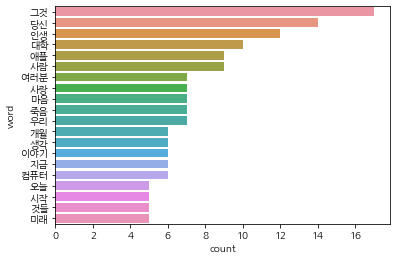

In [20]:
sns.barplot(data=df_wc.head(20),y='word',x='count')

In [21]:
dic_word = df_wc.set_index('word').to_dict()['count']
dic_word

{'그것': 17,
 '당신': 14,
 '인생': 12,
 '대학': 10,
 '애플': 9,
 '사람': 9,
 '여러분': 7,
 '사랑': 7,
 '마음': 7,
 '죽음': 7,
 '우리': 7,
 '개월': 6,
 '생각': 6,
 '이야기': 6,
 '지금': 6,
 '컴퓨터': 6,
 '오늘': 5,
 '시작': 5,
 '것들': 5,
 '미래': 5,
 '무엇': 5,
 '졸업': 5,
 '서체': 5,
 '회사': 4,
 '연결': 4,
 '여러분들': 4,
 '최고': 4,
 '입양': 4,
 '결정': 4,
 '학교': 4,
 '중요': 3,
 '당시': 3,
 '넥스트': 3,
 '췌장': 3,
 '때문': 3,
 '자신': 3,
 '직관': 3,
 '마지막': 3,
 '매킨토시': 3,
 '종양': 3,
 '의사들': 3,
 '세계': 3,
 '아침': 3,
 '않았다': 3,
 '기능': 3,
 '양부모님': 3,
 '개인용': 3,
 '결심': 3,
 '검사': 3,
 '학비': 3,
 '형태': 3,
 '수술': 2,
 '맞이': 2,
 '계획': 2,
 '위대한': 2,
 '세포': 2,
 '리드': 2,
 '진단': 2,
 '분명': 2,
 '수업': 2,
 '차고': 2,
 '순간': 2,
 '창업': 2,
 '두려움': 2,
 '동안': 2,
 '창업자': 2,
 '가능': 2,
 '필요': 2,
 '진정': 2,
 '이것': 2,
 '방법': 2,
 '해고': 2,
 '부모님': 2,
 '사건점': 2,
 '변화': 2,
 '자퇴': 2,
 '자퇴하': 2,
 '방식': 2,
 '작품': 2,
 '공동': 2,
 '발견': 2,
 '반추': 2,
 '구글': 2,
 '저녁': 2,
 '믿음': 2,
 '상황': 2,
 '생모': 2,
 '확정': 2,
 '불과': 2,
 '그것들': 2,
 '가지': 2,
 '아무': 2,
 '가정': 2,
 '그때': 2,
 '안주': 2,
 '내시경': 2,
 '치료': 2,
 '년대

In [22]:
from wordcloud import WordCloud
font = 'NanumGothic'

In [23]:
wc = WordCloud(random_state=1234,
               font_path=font,
               width=400,
               height=400,
               background_color='white'
               )

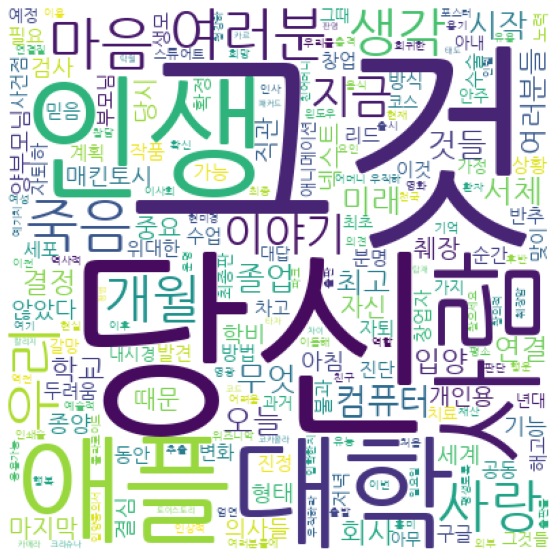

In [24]:
img_world = wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_world)